# Imports

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, learning_curve
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier

In [2]:
# figure settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_theme(style="whitegrid")
sns.set_palette(palette="Paired")

# set seed
np.random.seed(42)

# Load Data

In [3]:
X_train = pd.read_csv("../../data/processed/train_data_cleaned.csv")
y_train = pd.read_csv("../../data/processed/train_labels.csv")

In [4]:
X_train = X_train.iloc[:50000] # max 260601
y_train = y_train.iloc[:50000] # max 260601

# Random Forest

In [5]:
# Build random forest classifier
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=20,
                            max_features="sqrt",
                            random_state=42,
                            n_jobs=-1,
                            verbose=1)

In [6]:
# Perform cross validation
cv_results_rf = cross_validate(rf,
                               X_train,
                               y_train["damage_grade"],
                               cv=5,
                               scoring=("accuracy", "matthews_corrcoef", "f1_micro"),
                               return_train_score=True,
                               n_jobs=-1,
                               verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.7s finished


In [7]:
# Display results
df_cv_results_rf = pd.DataFrame(cv_results_rf).reset_index(names="k-fold")
display(df_cv_results_rf)

# Calculate mean and standard deviation for scores
cv_acc_mean_rf = df_cv_results_rf["test_accuracy"].mean()
cv_acc_std_rf = df_cv_results_rf["test_accuracy"].std()
print(f"Mean Accuracy: {cv_acc_mean_rf:.3f} +/- {cv_acc_std_rf:.3f}")

cv_f1_mean_rf = df_cv_results_rf["test_f1_micro"].mean()
cv_f1_std_rf = df_cv_results_rf["test_f1_micro"].std()
print(f"Mean F1: {cv_f1_mean_rf:.3f} +/- {cv_f1_std_rf:.3f}")

cv_mcc_mean_rf = df_cv_results_rf["test_matthews_corrcoef"].mean()
cv_mcc_std_rf = df_cv_results_rf["test_matthews_corrcoef"].std()
print(f"Mean MCC: {cv_mcc_mean_rf:.3f} +/- {cv_mcc_std_rf:.3f}")

# Calculate mean and standard deviation for train time
cv_train_time_mean_rf = df_cv_results_rf["fit_time"].mean()
cv_train_time_std_rf = df_cv_results_rf["fit_time"].std()
print(f"Mean Train Time: {cv_train_time_mean_rf:.3f} sec +/- {cv_train_time_std_rf:.3f}")

,k-fold,fit_time,score_time,test_accuracy,train_accuracy,test_matthews_corrcoef,train_matthews_corrcoef,test_f1_micro,train_f1_micro
0,0,3.288133,0.361516,0.6964,0.932100,0.424646,0.877719,0.6964,0.932100
1,1,3.267171,0.186568,0.6902,0.928200,0.412305,0.870849,0.6902,0.928200
2,2,3.249634,0.157211,0.6936,0.934825,0.421020,0.882726,0.6936,0.934825
3,3,3.422468,0.261411,0.6915,0.932550,0.414195,0.878546,0.6915,0.932550
4,4,4.616345,0.051429,0.6976,0.930400,0.426179,0.874619,0.6976,0.930400


Mean Accuracy: 0.694 +/- 0.003
Mean MCC: 0.420 +/- 0.006
Mean F1: 0.694 +/- 0.003
Mean Train Time: 3.569 +/- 0.590


# Xgboost

In [8]:
# Build Xgboost classifier
xgb = XGBClassifier(n_estimators=100,
                    max_depth=20,
                    learning_rate=0.1,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    random_state=42,
                    n_jobs=-1,
                    verbosity=1)

In [9]:
# Label encode y_train for Xgboost (expects 0, 1, 2, not 1, 2, 3)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train["damage_grade"].to_numpy())

In [10]:
# Perform cross validation
cv_results_xgb = cross_validate(xgb,
                                X_train,
                                y_train_encoded,
                                cv=5,
                                scoring=("accuracy", "matthews_corrcoef", "f1_micro"),
                                return_train_score=True,
                                n_jobs=-1,
                                verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


In [11]:
# Display results
df_cv_results_xgb = pd.DataFrame(cv_results_xgb).reset_index(names="k-fold")
display(df_cv_results_xgb)

# Calculate mean and standard deviation
cv_acc_mean_xgb = df_cv_results_xgb["test_accuracy"].mean()
cv_acc_std_xgb = df_cv_results_xgb["test_accuracy"].std()
print(f"Mean Accuracy: {cv_acc_mean_xgb:.3f} +/- {cv_acc_std_xgb:.3f}")

cv_f1_mean_xgb = df_cv_results_xgb["test_f1_micro"].mean()
cv_f1_std_xgb = df_cv_results_xgb["test_f1_micro"].std()
print(f"Mean F1: {cv_f1_mean_xgb:.3f} +/- {cv_f1_std_xgb:.3f}")

cv_mcc_mean_xgb = df_cv_results_xgb["test_matthews_corrcoef"].mean()
cv_mcc_std_xgb = df_cv_results_xgb["test_matthews_corrcoef"].std()
print(f"Mean MCC: {cv_mcc_mean_xgb:.3f} +/- {cv_mcc_std_xgb:.3f}")

# Calculate mean and standard deviation for train time
cv_train_time_mean_xgb = df_cv_results_xgb["fit_time"].mean()
cv_train_time_std_xgb = df_cv_results_xgb["fit_time"].std()
print(f"Mean Train Time: {cv_train_time_mean_xgb:.3f} sec +/- {cv_train_time_std_xgb:.3f}")

,k-fold,fit_time,score_time,test_accuracy,train_accuracy,test_matthews_corrcoef,train_matthews_corrcoef,test_f1_micro,train_f1_micro
0,0,55.607919,0.923877,0.7166,0.999900,0.468460,0.999820,0.7166,0.999900
1,1,55.814917,0.848518,0.7094,0.999725,0.453633,0.999505,0.7094,0.999725
2,2,55.686480,0.829792,0.7097,0.999800,0.456972,0.999640,0.7097,0.999800
3,3,56.402529,0.798261,0.7109,0.999725,0.456941,0.999505,0.7109,0.999725
4,4,55.216490,0.956884,0.7116,0.999500,0.456557,0.999100,0.7116,0.999500


Mean Accuracy: 0.712 +/- 0.003
Mean MCC: 0.459 +/- 0.006
Mean F1: 0.712 +/- 0.003
Mean Train Time: 55.746 +/- 0.430


# CatBoost

In [12]:
# Create a CatBoost classifier
cb = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function="MultiClass",
    random_seed=42,
    logging_level="Info"
)

In [13]:
# Perform cross validation
cv_results_cb = cross_validate(cb,
                               X_train,
                               y_train["damage_grade"],
                               cv=5,
                               scoring=("accuracy", "matthews_corrcoef", "f1_micro"),
                               return_train_score=True,
                               n_jobs=-1,
                               verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.7s finished


In [14]:
# Display results
df_cv_results_cb = pd.DataFrame(cv_results_cb).reset_index(names="k-fold")
display(df_cv_results_cb)

# Calculate mean and standard deviation
cv_acc_mean_cb = df_cv_results_cb["test_accuracy"].mean()
cv_acc_std_cb = df_cv_results_cb["test_accuracy"].std()
print(f"Mean Accuracy: {cv_acc_mean_cb:.3f} +/- {cv_acc_std_cb:.3f}")

cv_f1_mean_cb = df_cv_results_cb["test_f1_micro"].mean()
cv_f1_std_cb = df_cv_results_cb["test_f1_micro"].std()
print(f"Mean F1: {cv_f1_mean_cb:.3f} +/- {cv_f1_std_cb:.3f}")

cv_mcc_mean_cb = df_cv_results_cb["test_matthews_corrcoef"].mean()
cv_mcc_std_cb = df_cv_results_cb["test_matthews_corrcoef"].std()
print(f"Mean MCC: {cv_mcc_mean_cb:.3f} +/- {cv_mcc_std_cb:.3f}")

# Calculate mean and standard deviation for train time
cv_train_time_mean_cb = df_cv_results_cb["fit_time"].mean()
cv_train_time_std_cb = df_cv_results_cb["fit_time"].std()
print(f"Mean Train Time: {cv_train_time_mean_cb:.3f} +/- {cv_train_time_std_cb:.3f}")

,k-fold,fit_time,score_time,test_accuracy,train_accuracy,test_matthews_corrcoef,train_matthews_corrcoef,test_f1_micro,train_f1_micro
0,0,34.381994,0.031641,0.7045,0.767750,0.442168,0.567370,0.7045,0.767750
1,1,34.975375,0.031667,0.6972,0.766875,0.429130,0.565550,0.6972,0.766875
2,2,33.405794,0.015643,0.6976,0.766000,0.431350,0.564010,0.6976,0.766000
3,3,34.385853,0.031245,0.7015,0.767850,0.436226,0.567639,0.7015,0.767850
4,4,36.090290,0.016035,0.7039,0.766150,0.441062,0.564149,0.7039,0.766150


Mean Accuracy: 0.701 +/- 0.003
Mean MCC: 0.436 +/- 0.006
Mean F1: 0.701 +/- 0.003
Mean Train Time: 34.648 +/- 0.984


# Comparison Plot

In [15]:
def compare_models_cv_acc_mcc(cv_results_list, model_names, n_samples, ylim, figsize) -> None:
    """
    Plot stacked bar charts to compare cross-validation results of different models. The plot will contain two subplots, one for accuracy and one for MCC. The plot will also contain horizontal guidelines for random guessing and the mean accuracy and MCC.

    :param cv_results_list: A list of dicts of float arrays of shape (n_splits,) that contain the cross-validation results of each model. Follows sklearn.model_selection.cross_validate() output format. See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate for more details. Must contain the following keys: "test_accuracy", "test_matthews_corrcoef" in each dict list element. The length and order of the list must be equal to the length of model_names.
    :type cv_results_list: list
    :param model_names: A list of strings that represent the names of each model. The length and order of the list must be equal to the length of cv_results_list.
    :type model_names: list
    :param n_samples: The number of samples used in the cross-validation.
    :type n_samples: int
    :param ylim: The y-axis limits of the plot. Must be a tuple of two floats. The first float is the lower limit and the second float is the upper limit. The lower limit must be greater than or equal to 0. The upper limit must be less than or equal to 1.
    :type ylim: tuple
    :param figsize: The width and height of the plot in inches. Must be a tuple of two floats. The first float is the width and the second float is the height.
    :type figsize: tuple

    :return: None
    :rtype: None
    """

    # Check
    try:
        assert len(cv_results_list) == len(model_names)
    except AssertionError:
        print("cv_results_list and model_names must have the same length.")
        return

    # Create a figure
    fig, axes = plt.subplots(nrows=1, ncols=len(model_names), figsize=figsize)

    # Set palette
    palette = {
        "test_accuracy": sns.color_palette("Paired")[0],
        "test_matthews_corrcoef": sns.color_palette("Paired")[2]
    }

    # Plot each model
    for i, (cv_results, model_name) in enumerate(zip(cv_results_list, model_names)):
        # Create a dataframe
        df = pd.DataFrame(cv_results).reset_index(names='k-fold')
        df_melt = df[['k-fold', 'test_accuracy', 'test_matthews_corrcoef']].melt(id_vars=['k-fold'], var_name='Metric', value_name='Score')
        # Calculate mean and std
        agg = df_melt.groupby('Metric')['Score'].agg(['mean', 'std'])
        cv_mcc_mean = agg.loc["test_matthews_corrcoef"].at["mean"]
        cv_mcc_std = agg.loc["test_matthews_corrcoef"].at["std"]
        cv_acc_mean = agg.loc["test_accuracy"].at["mean"]
        cv_acc_std = agg.loc["test_accuracy"].at["std"]
        # Plot
        fig_ax = sns.barplot(x='k-fold', y='Score', hue='Metric', data=df_melt, ax=axes[i], dodge=False, errorbar=None, palette=palette)
        axes[i].set_title(f"Test Scoring {model_name}" + "\n" +
                          f"Mean MCC: {cv_mcc_mean:.3f} +/- {cv_mcc_std:.3f}, Mean Accuracy: {cv_acc_mean:.3f} +/- {cv_acc_std:.3f}")
        axes[i].legend().set_visible(False)
        # Add guidelines
        xmin, xmax = axes[i].get_xlim()
        axes[i].hlines(y=0.5, xmin=xmin, xmax=xmax, linestyles="dotted", colors='r', label="0.5")
        axes[i].hlines(y=cv_mcc_mean, xmin=xmin, xmax=xmax, linestyles="dashed", colors=sns.color_palette("Paired")[3], label="Mean MCC")
        axes[i].hlines(y=cv_acc_mean, xmin=xmin, xmax=xmax, linestyles="dashed", colors=sns.color_palette("Paired")[1], label="Mean Accuracy")
        # Set y-axis limits
        plt.setp(axes[i], ylim=ylim)

    # Set legend
    handles, labels = axes[0].get_legend_handles_labels()
    order = [0, 2, 3, 1, 4]
    plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.suptitle(f"Cross Validation Results ({n_samples} samples)", fontweight='bold')

    # Show plot
    plt.tight_layout()
    plt.show()

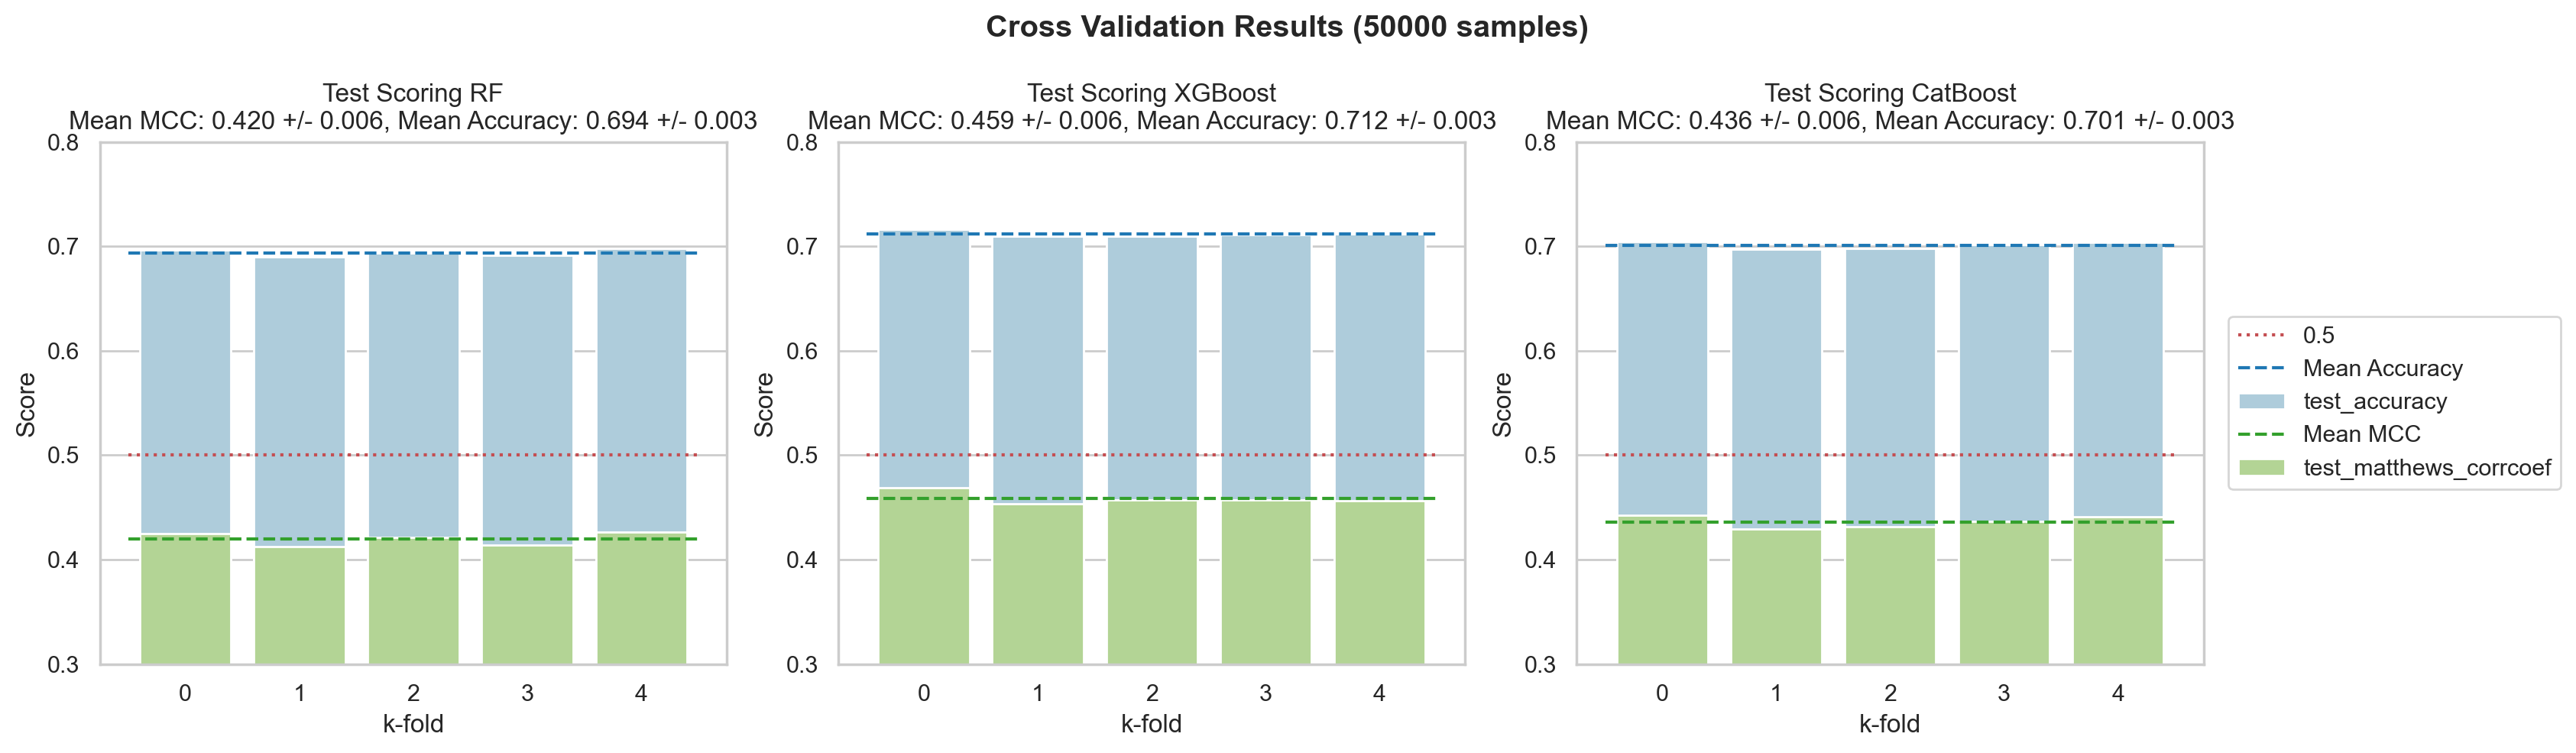

In [16]:
compare_models_cv_acc_mcc([cv_results_rf, cv_results_xgb, cv_results_cb], ["RF", "XGBoost", "CatBoost"], 50000, (0.3, 0.8), (17, 5))

In [32]:
def plot_learning_curve(rf, X_train, y_train, ax, ylim, cv, n_jobs, scoring, train_sizes):
    """
    Plots learning curves of a model.

    :param rf: Model to plot learning curves of.
    :type rf: sklearn model
    :param X_train: Training data.
    :type X_train: array-like of shape (n_samples, n_features)
    :param y_train: Target values.
    :type y_train: array-like of shape (n_samples,) or (n_samples, n_outputs)
    :param ax: Matplotlib axes.
    :type ax: matplotlib axes
    :param ylim: The y-axis limits of the plot. Must be a tuple of two floats. The first float is the lower limit and the second float is the upper limit. The lower limit must be greater than or equal to 0. The upper limit must be less than or equal to 1.
    :type ylim: tuple
    :param cv: Determines the cross-validation splitting strategy.
    :type cv: int
    :param n_jobs: Number of jobs to run in parallel.
    :type n_jobs: int
    :param scoring: Scoring metric to use.
    :type scoring: str
    :param train_sizes: Determines the number of training samples used in each cross-validation split.
    :type train_sizes: array-like of shape (n_ticks,)
    """

    # Calculate learning curve
    train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=cv, n_jobs=n_jobs, scoring=scoring, train_sizes=train_sizes)

    # Calculate mean and std
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.set_ylim(ylim)
    ax.legend(loc="best")

    return ax

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
models = [(rf, "RF")]
for ax, (model, name) in zip(axs, models):
    ax = plot_learning_curve(model, X_train, y_train, ax=ax, ylim=(0.3, 1.01), cv=5, n_jobs=-1, scoring="accuracy", train_sizes=np.linspace(.1, 1.0, 10))
    ax.set_title(f"Learning Curve {name}")
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Accuracy")
plt.suptitle("Learning Curves", fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\merti\anaconda3\envs\py310\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


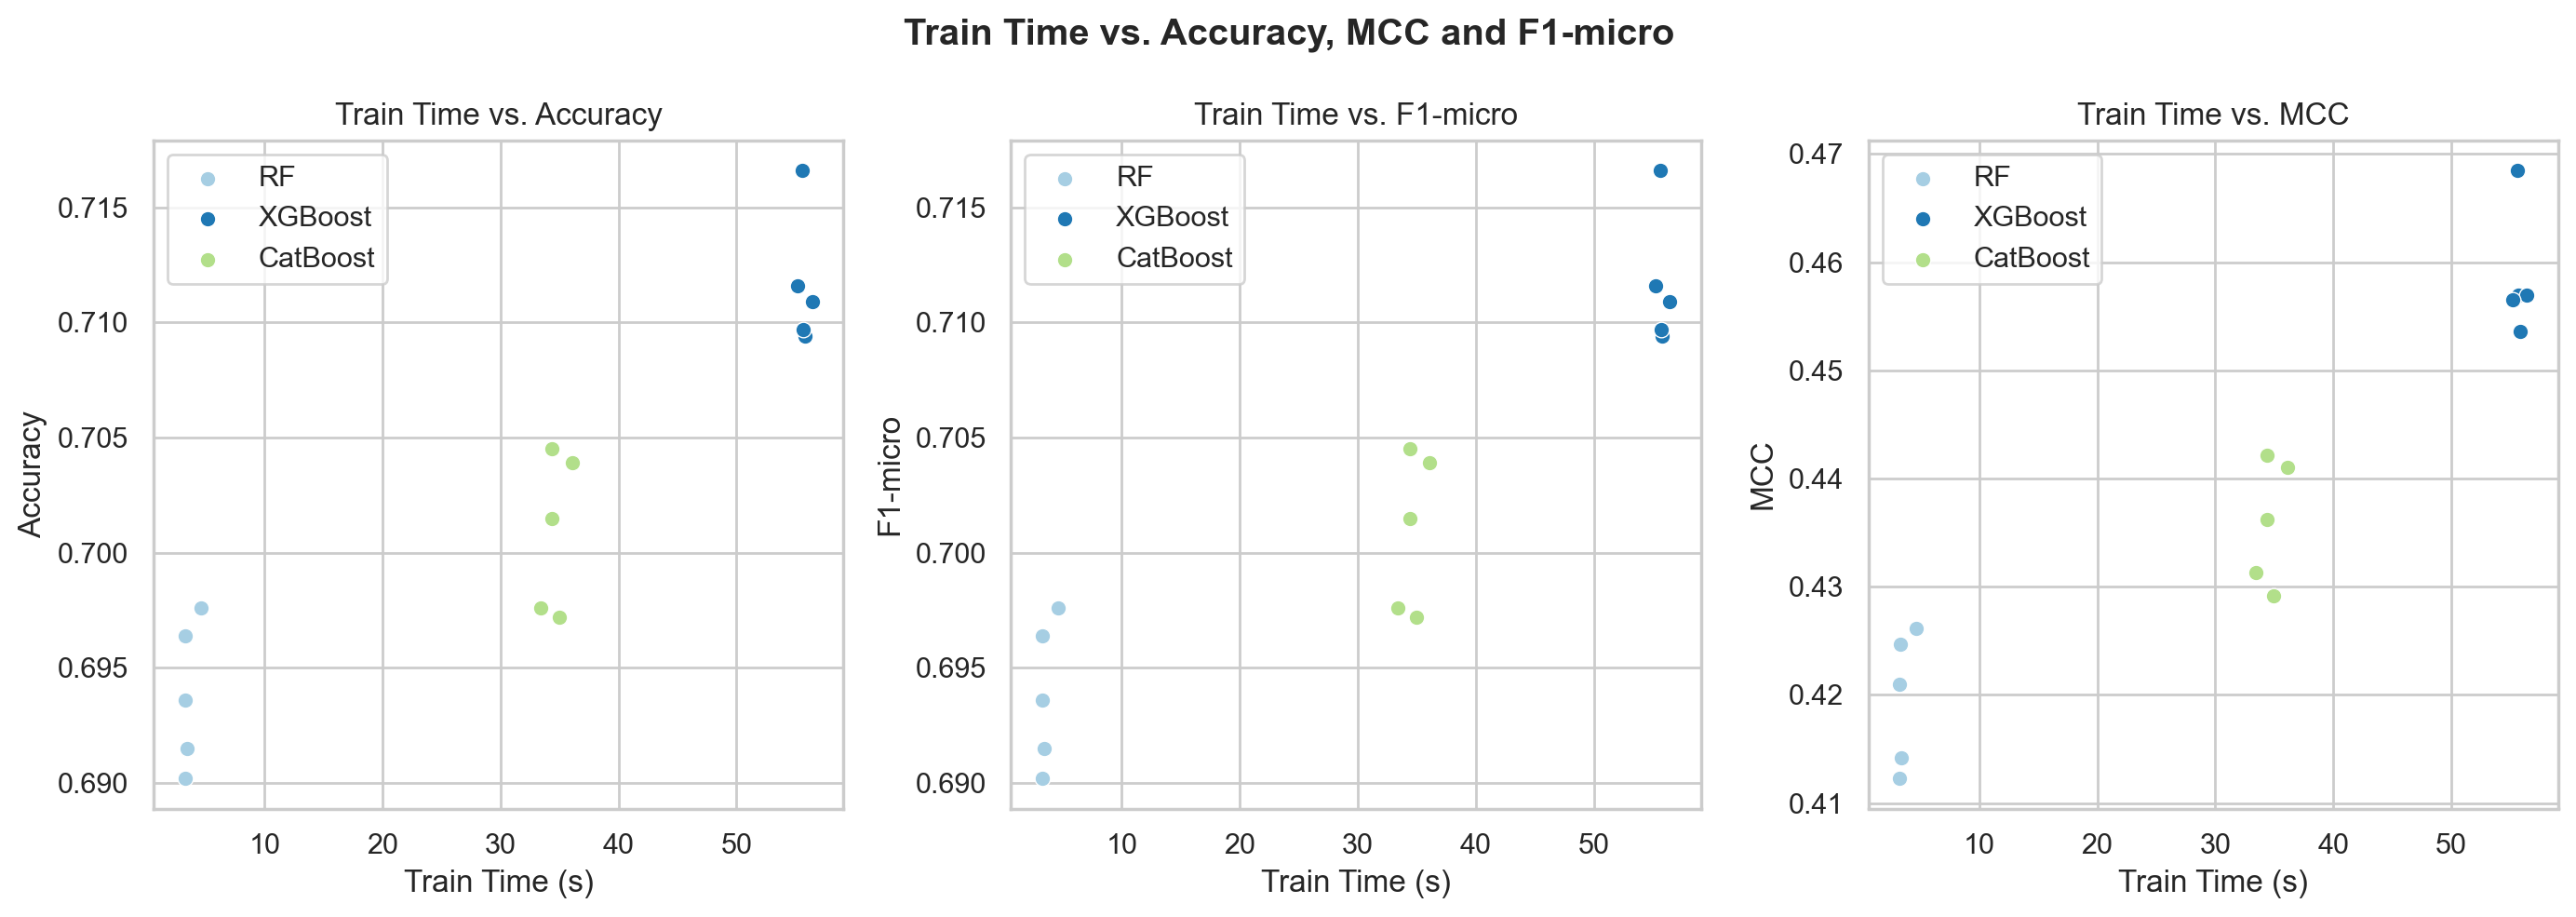

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

metrics = [("test_accuracy", "Accuracy"), ("test_f1_micro", "F1-micro"), ("test_matthews_corrcoef", "MCC")]
models = [("rf", "RF"), ("xgb", "XGBoost"), ("cb", "CatBoost")]

for i, metric in enumerate(metrics):
    for j, model in enumerate(models):
        sns.scatterplot(x="fit_time", y=metric[0], data=globals()[f"df_cv_results_{model[0]}"], ax=ax[i], label=model[1])
    ax[i].set_title(f"Train Time vs. {metric[1]}")
    ax[i].set_xlabel("Train Time (s)")
    ax[i].set_ylabel(metric[1])

plt.suptitle("Train Time vs. Accuracy, MCC and F1-micro", fontweight='bold')
plt.tight_layout()
plt.show()